In [1]:
# Import The Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore') # To Ignore The Warnings
pd.set_option('display.max_columns', None) # To Display All The Columns

# Load The Dataset
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

# First Look At The Dataset
print(f'Dataset Shape: {df.shape}\n')
df.head()

Dataset Shape: (5630, 20)



,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [2]:
# 1. Missing Values Analysis
print('Missing Values Analysis:\n')
print(df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)) # Display Columns With Missing Values
print('-' * 30)

# 2. Target Variable Analysis
print('Target Variable Analysis:\n')
print(df['Churn'].value_counts())
print('-' * 30)
print('Churn Distribution:\n')
print(df['Churn'].value_counts(normalize=True))

Missing Values Analysis:

DaySinceLastOrder              307
OrderAmountHikeFromlastYear    265
Tenure                         264
OrderCount                     258
CouponUsed                     256
HourSpendOnApp                 255
WarehouseToHome                251
dtype: int64
------------------------------
Target Variable Analysis:

Churn
0    4682
1     948
Name: count, dtype: int64
------------------------------
Churn Distribution:

Churn
0    0.831616
1    0.168384
Name: proportion, dtype: float64


In [3]:
# 1. Drop Unnecessary Columns
df.drop(columns=['CustomerID'], inplace = True)

# 2. Fill Missing Values
# A. Fill With Zero
fill_with_zero = ['CouponUsed', 'OrderCount', 'DaySinceLastOrder']

for col in fill_with_zero:
    df[col].fillna(0, inplace = True)

# B. Fill Numerical Columns With Median
num_cols = df.select_dtypes(include = ['float64', 'int64']).columns

for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace = True)

# C. Fill Categorical Columns With Mode
cat_cols = df.select_dtypes(include = ['object']).columns

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace = True)

# 3. Encode Categorical Variables
# One-Hot Encoding
df_model = pd.get_dummies(df, drop_first = True)

print('Data Preprocessing Completed Successfully!')
print(f'New Dataset Shape: {df_model.shape}')
df_model.head()

Data Preprocessing Completed Successfully!
New Dataset Shape: (5630, 30)


,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,159.93,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True
1,1,9.0,1,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,120.90,False,True,False,False,False,False,False,True,True,False,False,True,False,False,False,True
2,1,9.0,1,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120.28,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,True
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134.07,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,True
4,1,0.0,1,12.0,3.0,3,5,3,0,11.0,1.0,1.0,3.0,129.60,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True


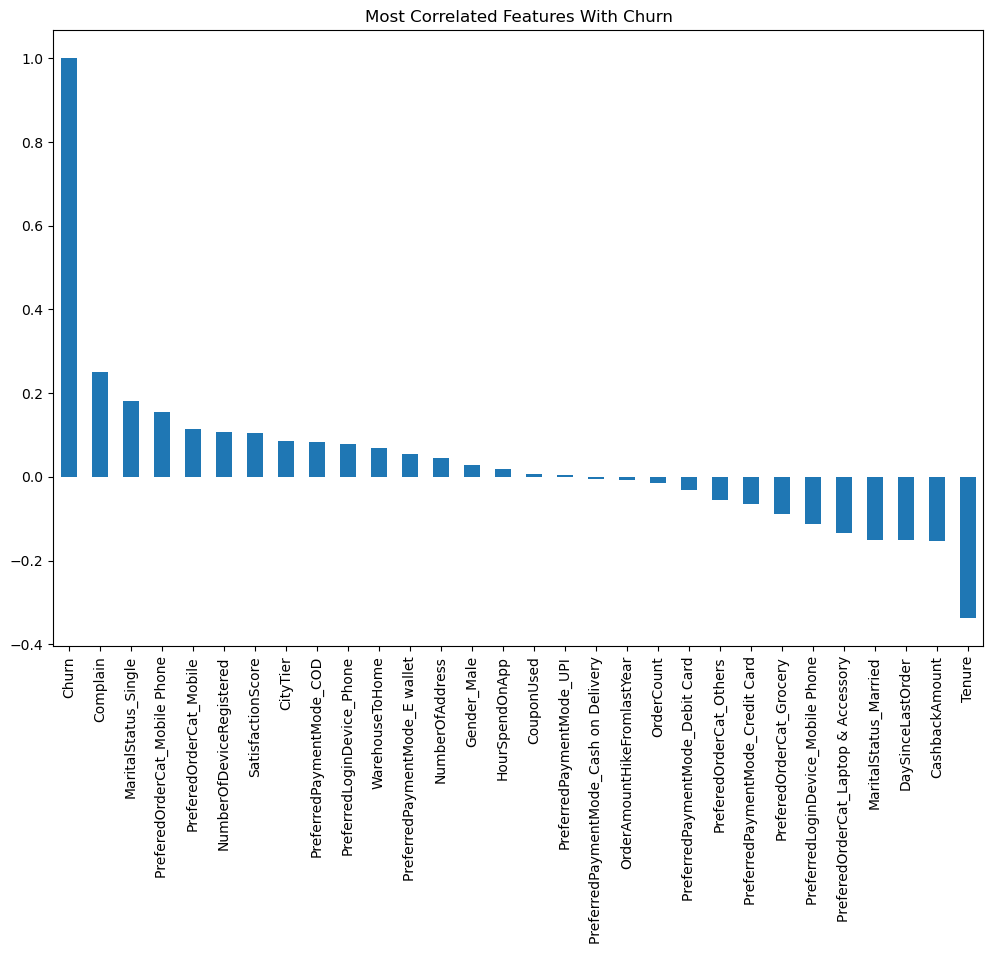

In [4]:
plt.figure(figsize = (12, 8))

# Lets calculate the correlation other variables have with our target variable 'Churn'
df_model.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')
plt.title('Most Correlated Features With Churn')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# SMOTE for Balancing The Dataset
from imblearn.over_sampling import SMOTE

# 1. Split The Data
X = df_model.drop('Churn', axis = 1)
y = df_model['Churn']

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1903, stratify = y)

# 3. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Handle Class Imbalance With SMOTE
smote = SMOTE(random_state = 1903)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Lets Check The Class Distribution Before And After SMOTE
print(f'Original Training Set Class Distribution:\n{y_train.value_counts()}\n')
print(f'Training Set Class Distribution After SMOTE:\n{y_train_smote.value_counts()}')

print('--- Model Training And Evaluation... ---')

# 5. Model Training
models = {
    'Logistic Regression': LogisticRegression(random_state = 1903),
    'Random Forest': RandomForestClassifier(random_state = 1903),
    'XGBoost': XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state = 1903)
}

results = []

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote) # Train The Model With SMOTE Data
    y_pred = model.predict(X_test_scaled)   # Make Predictions On The Real Test Set

    # Let's Calculate The Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1 Score': f1,
        'Recall': recall
    })

    # 6. Lets See The Results
results_df = pd.DataFrame(results)
results_df

Original Training Set Class Distribution:
Churn
0    3746
1     758
Name: count, dtype: int64

Training Set Class Distribution After SMOTE:
Churn
0    3746
1    3746
Name: count, dtype: int64
--- Model Training And Evaluation... ---


,Model,Accuracy,F1 Score,Recall
0,Logistic Regression,0.807282,0.589792,0.821053
1,Random Forest,0.956483,0.866485,0.836842
2,XGBoost,0.971581,0.915344,0.910526


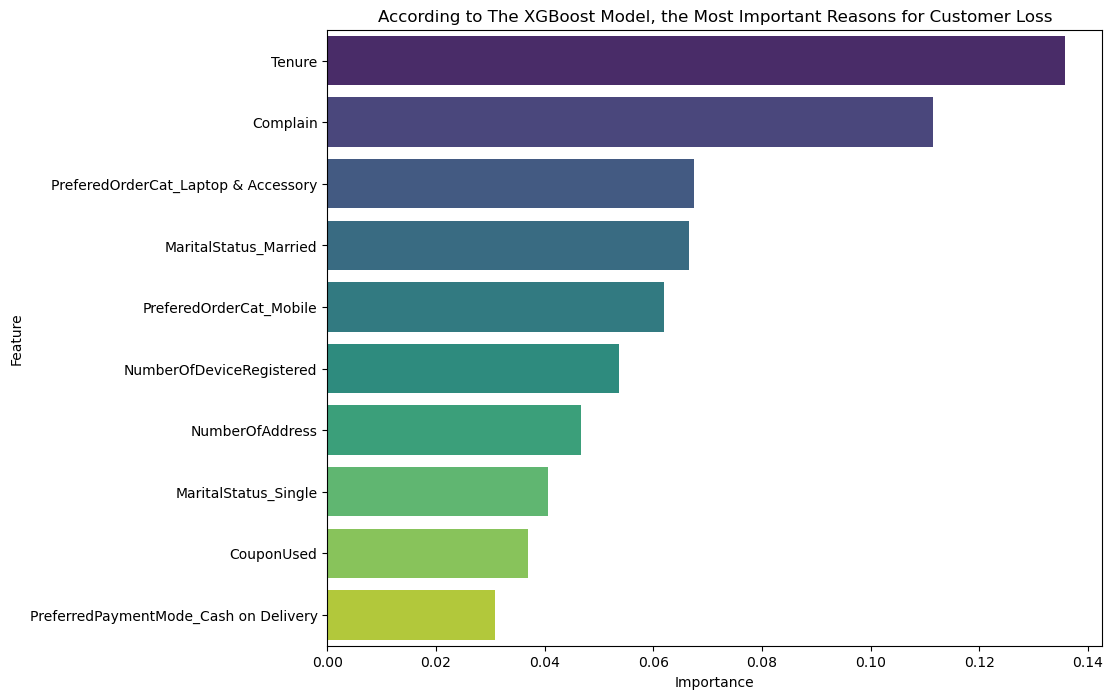

In [7]:
xgb_model = models['XGBoost']

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by = 'Importance', ascending = False)

# Visualize Feature Importance
plt.figure(figsize = (10, 8))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance.head(10), palette = 'viridis')
plt.title('According to The XGBoost Model, the Most Important Reasons for Customer Loss')
plt.show()

In [ ]:
import joblib

# Save The Model
joblib.dump(xgb_model, 'merchant_churn_model.pkl')

# Save The Scaler
joblib.dump(scaler, 'scaler.pkl')

print('Model and Scaler Saved Successfully!')

In [ ]:
# --- BUSINESS VALUE ANALYSIS ---
# Assumption: Each churned seller causes an average revenue loss of 10,000 TL for the company.
average_loss_per_churn = 10000

# Assumption: We are able to retain 50% of the sellers identified as potential churners.
retention_rate = 0.50 

# Let's get the number of True Positives (those that actually went away and that we caught) from the Confusion Matrix.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
true_positives = cm[1, 1] # Number of sellers correctly predicted as churners

saved_revenue = true_positives * average_loss_per_churn * retention_rate


print(f'Number of Sellers Correctly Predicted as Churners (True Positives): {true_positives}')
print(f'Estimated Revenue Saved by Retaining These Sellers: {saved_revenue:,.0f} TL')


Number of Sellers Correctly Predicted as Churners (True Positives): 173
Estimated Revenue Saved by Retaining These Sellers: 865,000 TL
